# Time Semantics

## Preamble

### Goals
- load timeseries data using Pandas
- create a Pandas Series with desired time intervals
- create Pyleoclim Series with desired time intervals
- Plot Pyleoclim Series 
- Plot spectral analysis with Pyleoclim


### Keywords

### Pre-requisites
None. This tutorial assumes basic knowledge of Python. If you are not familiar with this coding language, check out this tutorial: http://linked.earth/LeapFROGS/.

### Relevant Packages
Pyleoclim, Pandas

## Data Description
Data provided by @bdamir5. "The data are my own measurements of CO2 concentration in the urban area of city Zagreb. They are sampled at a two-second frequency with the common low-cost CO2 sensor Senseair K30 and saved in .txt or .log files. Then I did some Python gymnastics to load all those log files to Pandas dataframe and extract whole-hour measurements. I exported the data to Excel to have them in one place when uploading here."

## Demonstration

First import all necessary packages

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from matplotlib.ticker import FuncFormatter
import os 
import pyleoclim as pyleo
import datetime

### Load dataset 
Load dataset (excel file) as Pandas dataframe and print contents to see format.

In [2]:
df = pd.read_excel('../data/df_senzor2_cvetkovic.xlsx')
df.head()

,Time,CO2 Value [ppm]
0,2022-08-21 20:00:00,406
1,2022-08-21 21:00:00,412
2,2022-08-21 22:00:00,420
3,2022-08-21 23:00:00,439
4,2022-08-22 00:00:00,437


### Convert Time column into datetime format (if not already)

In [3]:
# convert time to datetime
df['Time'] = pd.to_datetime(df['Time'])

### Create Pandas Series object from dataframe

makes Series with datetime time as the index and CO2 ppm as the values. Then plot Pandas series. 

In [4]:
#create series
data_series = pd.Series(data=df['CO2 Value [ppm]'].values,
                        index=df['Time'],
                        name = 'CO2 Value')

print(data_series)

Time
2022-08-21 20:00:00    406
2022-08-21 21:00:00    412
2022-08-21 22:00:00    420
2022-08-21 23:00:00    439
2022-08-22 00:00:00    437
                      ... 
2024-08-06 13:00:00    396
2024-08-06 14:00:00    391
2024-08-06 15:00:00    392
2024-08-06 16:00:00    393
2024-08-06 17:00:00    392
Name: CO2 Value, Length: 9677, dtype: int64


<Axes: title={'center': 'CO2 ppm'}, xlabel='Time'>

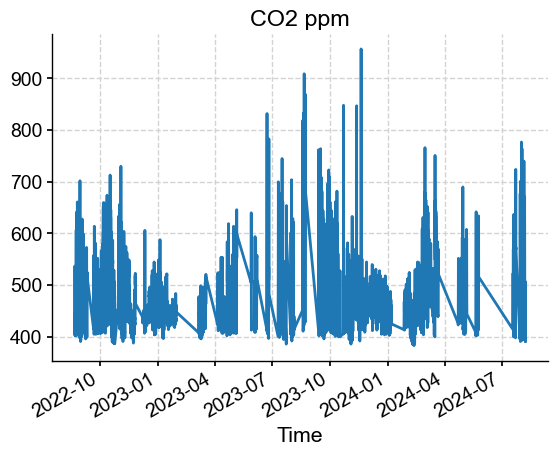

In [5]:
data_series.plot(title='CO2 ppm')

### Create Pyleo Series with desired time frequency

Create metadata with time unit and value unit to convert directly from Pandas Series to Pyleoclim Series. Then plot with Pyeloclim. You will notice that the time values change from YYYY-MM format into decimal year. This is done by default in pyleoclim to handle most paleoclimate data. 

In [6]:
metadata = {
    'time_name': 'Year',  
    'time_unit': 'year',   
    'value_name': data_series.name,
    'value_unit': 'ppm'
}

# Convert to Pyleoclim Series
pyleo_series = pyleo.Series.from_pandas(
    ser=data_series,
    metadata=metadata
)

(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'CO2 ppm'}, xlabel='Time [year]', ylabel='CO2 Value [ppm]'>)

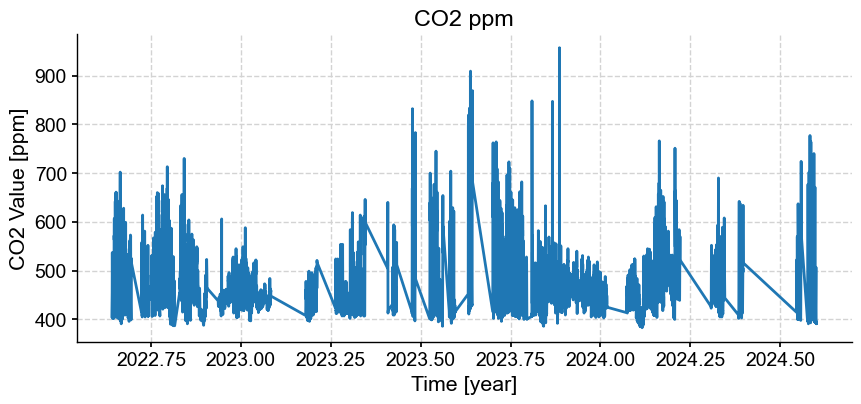

In [7]:
pyleo_series.plot(title='CO2 ppm')

### Changing plotting styles with Pyleoclim

In [8]:
# try web for web-like font
pyleo.utils.plotting.set_style('web')

(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'CO2 ppm'}, xlabel='Time [year]', ylabel='CO2 Value [ppm]'>)

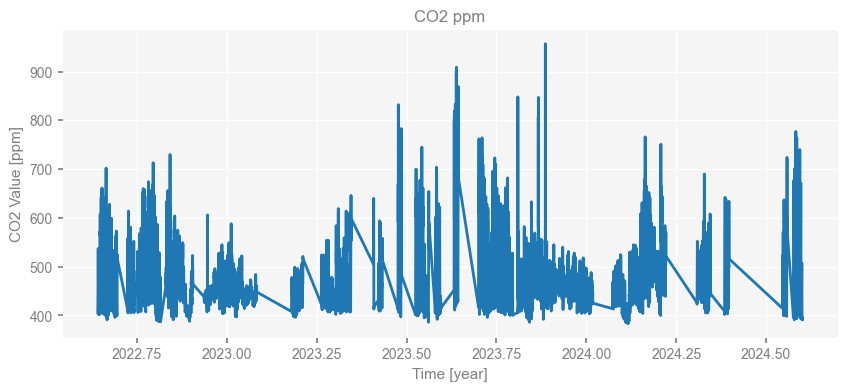

In [9]:
pyleo_series.plot(title='CO2 ppm')

In [10]:
# back to the default -- matplotlib
pyleo.utils.plotting.set_style('matplotlib')

(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'CO2 ppm'}, xlabel='Time [year]', ylabel='CO2 Value [ppm]'>)

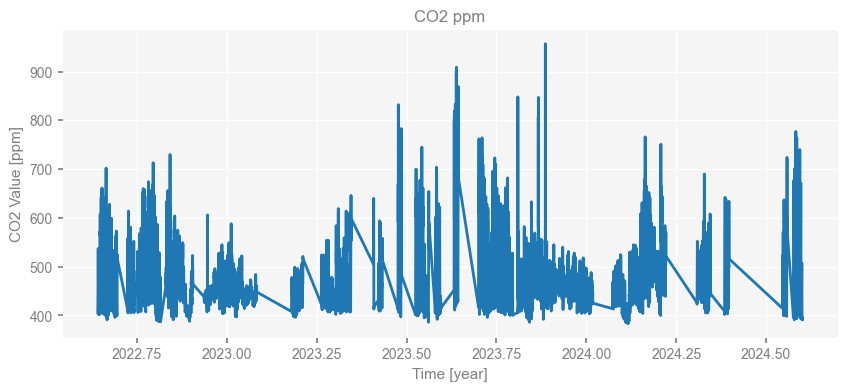

In [11]:
pyleo_series.plot(title='CO2 ppm')

### Spectral Analysis

Using `pyleoclim.Series.spectral()` to plot the PSD and significance test

In [12]:
psd = pyleo_series.spectral(method='lomb_scargle')
psd_sig = psd.signif_test(method='CN',number=10) # This number should be much larger for actual science applications

Performing spectral analysis on individual series: 100%|██████████| 10/10 [01:02<00:00,  6.25s/it]


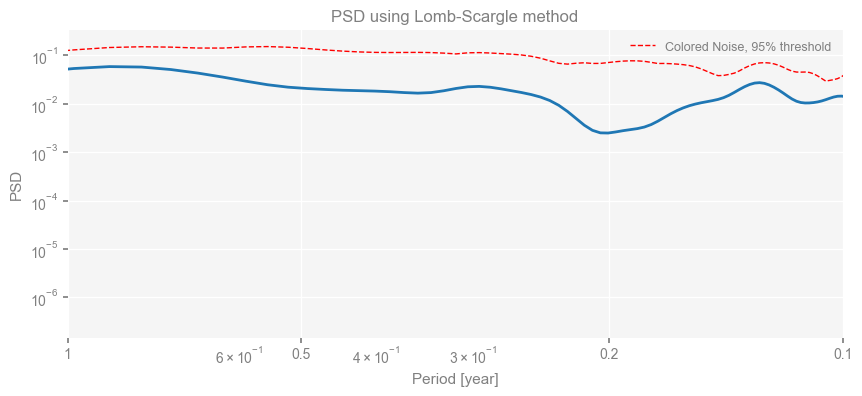

In [13]:
fig, ax = psd_sig.plot(title='PSD using Lomb-Scargle method')